In [313]:
data <- read.csv("Documents/covid_19_chile.csv",sep=";")

cor(data$Dia, log(data$Nuevos))

lm(Nuevos ~ exp(Dia), data=data)

[1] 0.9709316


Call:
lm(formula = Nuevos ~ exp(Dia), data = data)

Coefficients:
(Intercept)     exp(Dia)  
  2.380e+01    2.033e-07  


Nonlinear regression model
  model: Nuevos ~ a * exp(b * Dia)
   data: data[-c(17:20), ]
     a      b 
1.2327 0.2371 
 residual sum-of-squares: 2826

Number of iterations to convergence: 12 
Achieved convergence tolerance: 6.93e-06

[1] 0.9958896


	Two-sample Kolmogorov-Smirnov test

data:  cumsum(predict(model, newdata = newdata)) and cumsum(data$Nuevos)
D = 0.15, p-value = 0.9831
alternative hypothesis: two-sided


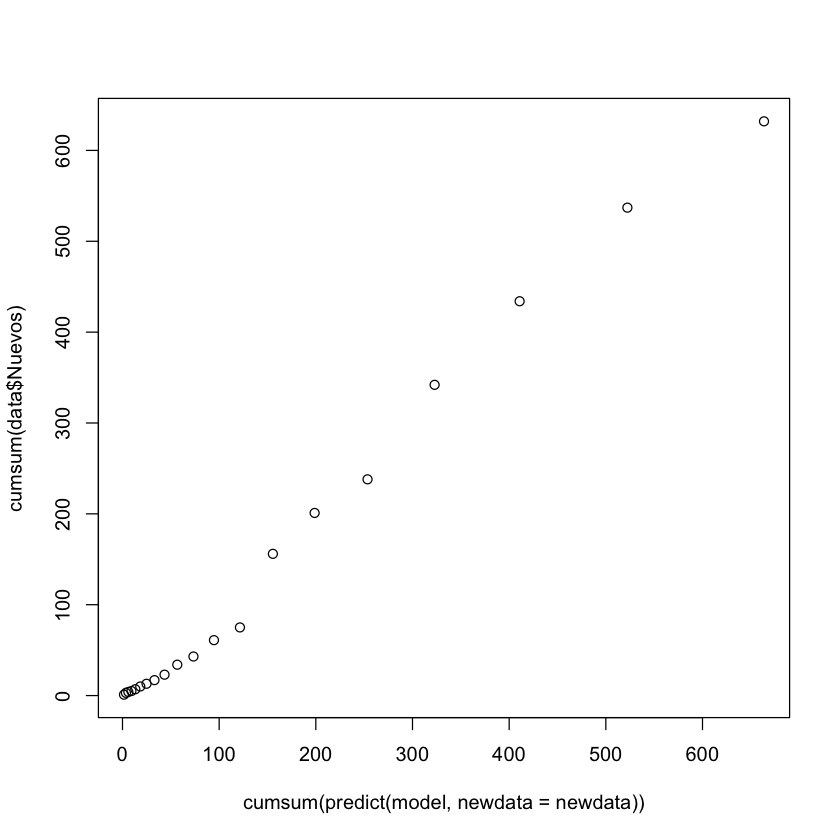

In [306]:
model <- nls(Nuevos ~ a*exp(b*Dia), data = data[-c(17:20),] , start = list(a=1,b=3.951e-06))
model
newdata <- data.frame(Dia=c(1:20))
qqplot(cumsum(predict(model, newdata=newdata)),cumsum(data$Nuevos))
cor(cumsum(predict(model, newdata=newdata)),cumsum(data$Nuevos))
ks.test(cumsum(predict(model, newdata=newdata)),cumsum(data$Nuevos))

In [308]:
shapiro.test(cumsum(predict(model, newdata=newdata)) - cumsum(data$Nuevos))


	Shapiro-Wilk normality test

data:  cumsum(predict(model, newdata = newdata)) - cumsum(data$Nuevos)
W = 0.97911, p-value = 0.9222


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“valor pch '26' no implementado”


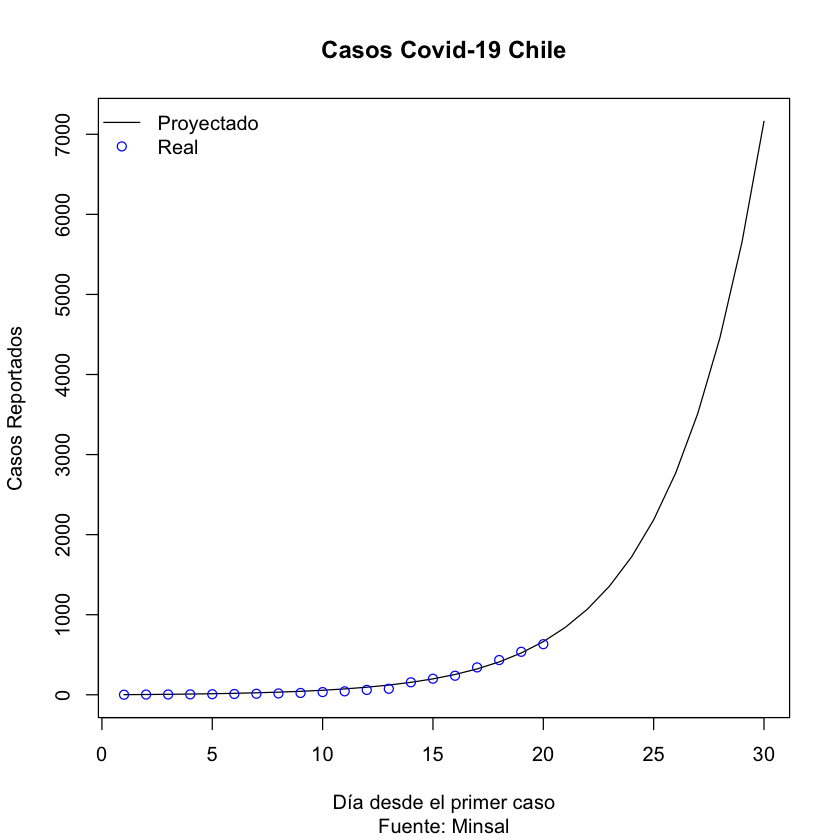

In [312]:
newdata <- data.frame(Dia=c(1:30))
plot(cumsum(predict(model, newdata=newdata)), 
     main = "Casos Covid-19 Chile", 
     sub = "Fuente: Minsal", 
     xlab = "Día desde el primer caso", 
     ylab="Casos Reportados",
     type='l')
points(data$Dia,cumsum(data$Nuevos),col='blue')
legend('topleft', legend=c('Proyectado','Real'),pch=c(26,1),bty='n',col=c('black','blue'), lty=c(1,0))

In [259]:
cumsum(predict(model, newdata=newdata))

[1]    3.273405    7.227291   12.003117   17.771749   24.739573   33.155878
 [7]   43.321778   55.600981   70.432803   88.347887  109.987185  136.124894
[13]  167.696150  205.830486  251.892246  307.529395  374.732480  455.905843
[19]  553.953649  672.383782  815.433351  988.220283 1196.926424 1449.018716
[25] 1753.516337 2121.313387 2565.568647 3102.176367 3750.334916 4533.233651